<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Projects/BDS35_NNP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df= pd.read_csv('/content/drive/MyDrive/Data Science/NNP/Hotel_Reviews.csv')


In [9]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [10]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [11]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [12]:
columns_to_drop = ['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name',
                   'Total_Number_of_Reviews', 'Total_Number_of_Reviews_Reviewer_Has_Given',
                   'Tags', 'days_since_review']

df2 = df.drop(columns=columns_to_drop)

In [13]:
df2.head()

,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,lat,lng
0,Russia,I am so angry that i made this post available...,397,Only the park outside of the hotel was beauti...,11,2.9,52.360576,4.915968
1,Ireland,No Negative,0,No real complaints the hotel was great great ...,105,7.5,52.360576,4.915968
2,Australia,Rooms are nice but for elderly a bit difficul...,42,Location was good and staff were ok It is cut...,21,7.1,52.360576,4.915968
3,United Kingdom,My room was dirty and I was afraid to walk ba...,210,Great location in nice surroundings the bar a...,26,3.8,52.360576,4.915968
4,New Zealand,You When I booked with your company on line y...,140,Amazing location and building Romantic setting,8,6.7,52.360576,4.915968


In [14]:
df2[df2.isnull().any(axis=1)].head()

,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,lat,lng
99488,Australia,No Negative,0,Upgraded rooms are excellent Good size for tr...,25,10.0,NaN,NaN
99489,United Kingdom,Noise Not being told about this when we check...,12,The location was great However renovations we...,45,6.7,NaN,NaN
99490,United States of America,Room was worn down One of the curtains did no...,43,Location was good,5,5.4,NaN,NaN
99491,Australia,Access to shower was by the tub which is very...,54,No Positive,0,8.3,NaN,NaN
99492,United States of America,The breakfast was way over priced and the sta...,83,The property was conveniently located near th...,11,5.8,NaN,NaN


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Assume df is your DataFrame
missing_hotels = df2[df2['lat'].isnull() | df2['lng'].isnull()]

# Extract hotels with valid coordinates as reference
reference_hotels = df2.dropna(subset=['lat', 'lng'])

# Impute missing values in both reference and missing hotels
imputer = SimpleImputer(strategy='mean')
df2_imputed = pd.DataFrame(imputer.fit_transform(df2[['lat', 'lng']]), columns=['lat', 'lng'])
reference_hotels_imputed = pd.DataFrame(imputer.transform(reference_hotels[['lat', 'lng']]), columns=['lat', 'lng'])
missing_hotels_imputed = pd.DataFrame(imputer.transform(missing_hotels[['lat', 'lng']]), columns=['lat', 'lng'])

# Train NearestNeighbors model with imputed data
X = reference_hotels_imputed[['lat', 'lng']]
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X)

# Find the nearest reference hotel for each missing hotel
distances, indices = nbrs.kneighbors(missing_hotels_imputed[['lat', 'lng']])

# Update missing values with coordinates from the nearest reference hotel
df2.loc[missing_hotels.index, ['lat', 'lng']] = reference_hotels_imputed.loc[indices.flatten(), ['lat', 'lng']].values

In [16]:
df2.isna().sum()

Reviewer_Nationality                 0
Negative_Review                      0
Review_Total_Negative_Word_Counts    0
Positive_Review                      0
Review_Total_Positive_Word_Counts    0
Reviewer_Score                       0
lat                                  0
lng                                  0
dtype: int64

In [17]:
# Highest reviewers from which nationality
df2.value_counts("Reviewer_Nationality",ascending=False).head(5)

Reviewer_Nationality
 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
dtype: int64

In [18]:
# Lowest Reviewers from which nationality
df2.value_counts("Reviewer_Nationality",ascending=True).head(10)

Reviewer_Nationality
 Svalbard Jan Mayen           1
 Guinea                       1
 Cape Verde                   1
 Vatican City                 1
 Northern Mariana Islands     1
 Palau                        1
 Tuvalu                       1
 Anguilla                     1
 Comoros                      1
 South Sudan                  2
dtype: int64

In [19]:
# Property with best reviewer_score overall and least score overall
score=df2.groupby(['lat', 'lng'])['Reviewer_Score'].mean()
score.sort_values(ascending= False)

lat        lng     
48.867947  2.328959    9.725000
41.383241  2.168530    9.718937
48.864866  2.329576    9.688525
48.860512  2.310653    9.671930
41.396211  2.162117    9.660345
                         ...   
48.837689  2.306310    6.329730
52.349743  4.891191    6.009465
48.887128  2.314205    5.864516
48.886570  2.358833    5.852632
45.450867  9.194866    5.121538
Name: Reviewer_Score, Length: 1472, dtype: float64

In [36]:
latitude = 48.867947
longitude = 2.328959
tolerance = 1e-6  # Tolerance for floating-point comparisons

# Use the logical 'and' operator and include a tolerance for floating-point comparisons
result = df[(abs(df['lat'] - latitude) < tolerance) & (abs(df['lng'] - longitude) < tolerance)]

# Extract Hotel_Name from the result
hotel_name = result['Hotel_Name'].values[4] if not result.empty else None

print("Property:", hotel_name)


Property: Ritz Paris


In [21]:
score.sort_values()

lat        lng     
45.450867  9.194866    5.121538
48.886570  2.358833    5.852632
48.887128  2.314205    5.864516
52.349743  4.891191    6.009465
48.837689  2.306310    6.329730
                         ...   
41.396211  2.162117    9.660345
48.860512  2.310653    9.671930
48.864866  2.329576    9.688525
41.383241  2.168530    9.718937
48.867947  2.328959    9.725000
Name: Reviewer_Score, Length: 1472, dtype: float64

In [37]:
latitude = 45.450867
longitude =  9.194866
tolerance = 1e-6  # Tolerance for floating-point comparisons

# Use the logical 'and' operator and include a tolerance for floating-point comparisons
result = df[(abs(df['lat'] - latitude) < tolerance) & (abs(df['lng'] - longitude) < tolerance)]

# Extract Hotel_Name from the result
hotel_name = result['Hotel_Name'].values[4] if not result.empty else None

print("Property:", hotel_name)

Property: Hotel Liberty


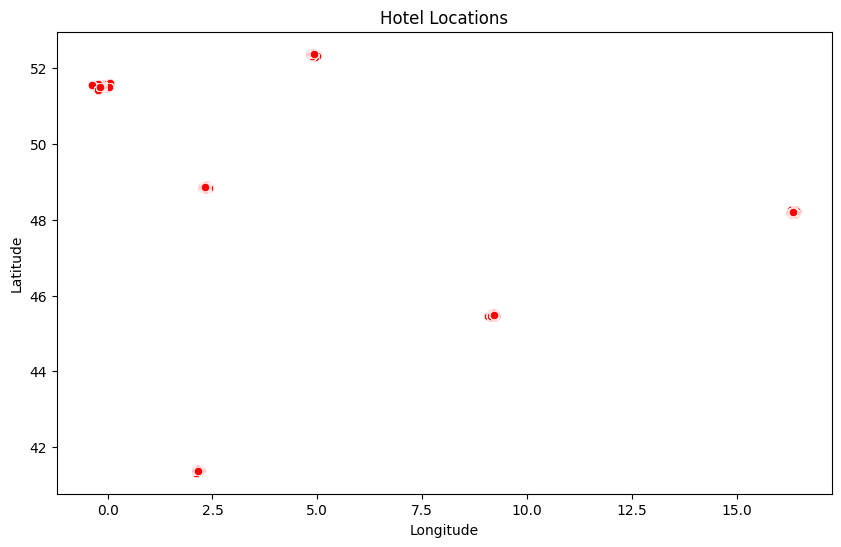

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'lat' and 'lng' are the column names for latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lng', y='lat', data=df, marker='o', color='red')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hotel Locations')

# Show the plot
plt.show()


In [23]:
# Which property has highest reviews and lowest in last 1 month of the dataset maximum date

In [42]:
# Changing 'Review_Date' column to datetime
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Identify the maximum date in the dataset
max_date = df['Review_Date'].max()

# Filter the dataset to include only entries from the last 1 month
last_month_reviews = df[df['Review_Date'] >= max_date - pd.DateOffset(months=1)]

# Find the property with the highest and lowest number of reviews
property_with_highest_reviews = last_month_reviews.loc[last_month_reviews['Total_Number_of_Reviews'].idxmax()]
property_with_lowest_reviews = last_month_reviews.loc[last_month_reviews['Total_Number_of_Reviews'].idxmin()]

print("Property with Highest Reviews:")
print(property_with_highest_reviews[['Hotel_Name', 'Total_Number_of_Reviews']])

print("\nProperty with Lowest Reviews:")
print(property_with_lowest_reviews[['Hotel_Name', 'Total_Number_of_Reviews']])


Property with Highest Reviews:
Hotel_Name                 Hotel Da Vinci
Total_Number_of_Reviews             16670
Name: 488409, dtype: object

Property with Lowest Reviews:
Hotel_Name                 The Henrietta Hotel
Total_Number_of_Reviews                     49
Name: 48780, dtype: object
